# 检验模型准确度

In [1]:
import pandas as pd

# 读取数据
melbourne_file_path = './input/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
# 去除空数据
filter_melbourne_data = melbourne_data.dropna(axis=0)

In [2]:
# データを選択する
y = filter_melbourne_data.Price
melbourne_features = [
    'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
    'Longtitude'
]

X = filter_melbourne_data[melbourne_features]


In [3]:
# 建築模型
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor()

# モデルの適合
melbourne_model.fit(X, y)


DecisionTreeRegressor()

In [4]:
# 计算绝对误差
from sklearn.metrics import mean_absolute_error

predicted_home_price = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_price)


434.71594577146544

验证数据

データを検証する

In [5]:
import random

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X, train_y)

val_predictions = melbourne_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

262157.8908973531


# 过拟合和负拟合

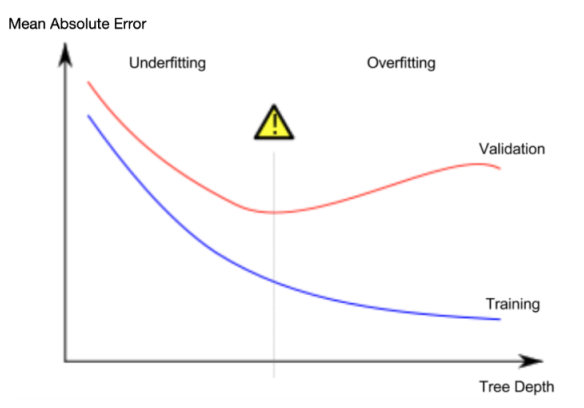

In [6]:
# 检验不同的max_leaf_nodes对于MAE的影响
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,
                                  random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae


In [9]:
# 比较max_leaf_nodes分别为5、50、500、5000
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print('Max leaf nodes: %d \t Mean Ablsolute Error: %d' %
          (max_leaf_nodes, my_mae))


Max leaf nodes: 5 	 Mean Ablsolute Error: 347380
Max leaf nodes: 50 	 Mean Ablsolute Error: 258171
Max leaf nodes: 500 	 Mean Ablsolute Error: 243495
Max leaf nodes: 5000 	 Mean Ablsolute Error: 255575
